In [1]:
from google.colab import drive
import zipfile
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import tensorflow as tf

# Step 1: Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Step 2: Define ZIP path and extraction directory
zip_path = '/content/drive/MyDrive/archive (2).zip'
extract_dir = '/content'

# Step 3: Extract the ZIP file
if os.path.exists(zip_path):
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print(f"Successfully extracted '{zip_path}' to '{extract_dir}'")
    except zipfile.BadZipFile:
        print(f"Error: '{zip_path}' is not a valid zip file.")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print(f"Error: '{zip_path}' does not exist.")

# Step 4: Define the correct path to training data
# After extraction, inspect to find the exact folder name
# The path below is corrected based on the user's global variables and is a likely path
# User needs to verify this path by exploring files in `/content` after extraction
train_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

# Step 5: Confirm the training directory exists
if os.path.exists(train_dir):
    print(f"The directory '{train_dir}' exists.")
else:
    print(f"Error: The directory '{train_dir}' does not exist. Please check the path.")

# Step 6: Set image size
image_size = 224

# Step 7: Create training data generator
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1
).flow_from_directory(
    train_dir,  #Corrected path
    batch_size=164,
    target_size=(image_size, image_size),
    subset='training',
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True
)

Mounted at /content/drive
Successfully extracted '/content/drive/MyDrive/archive (2).zip' to '/content'
The directory '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train' exists.
Found 63282 images belonging to 38 classes.


In [2]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

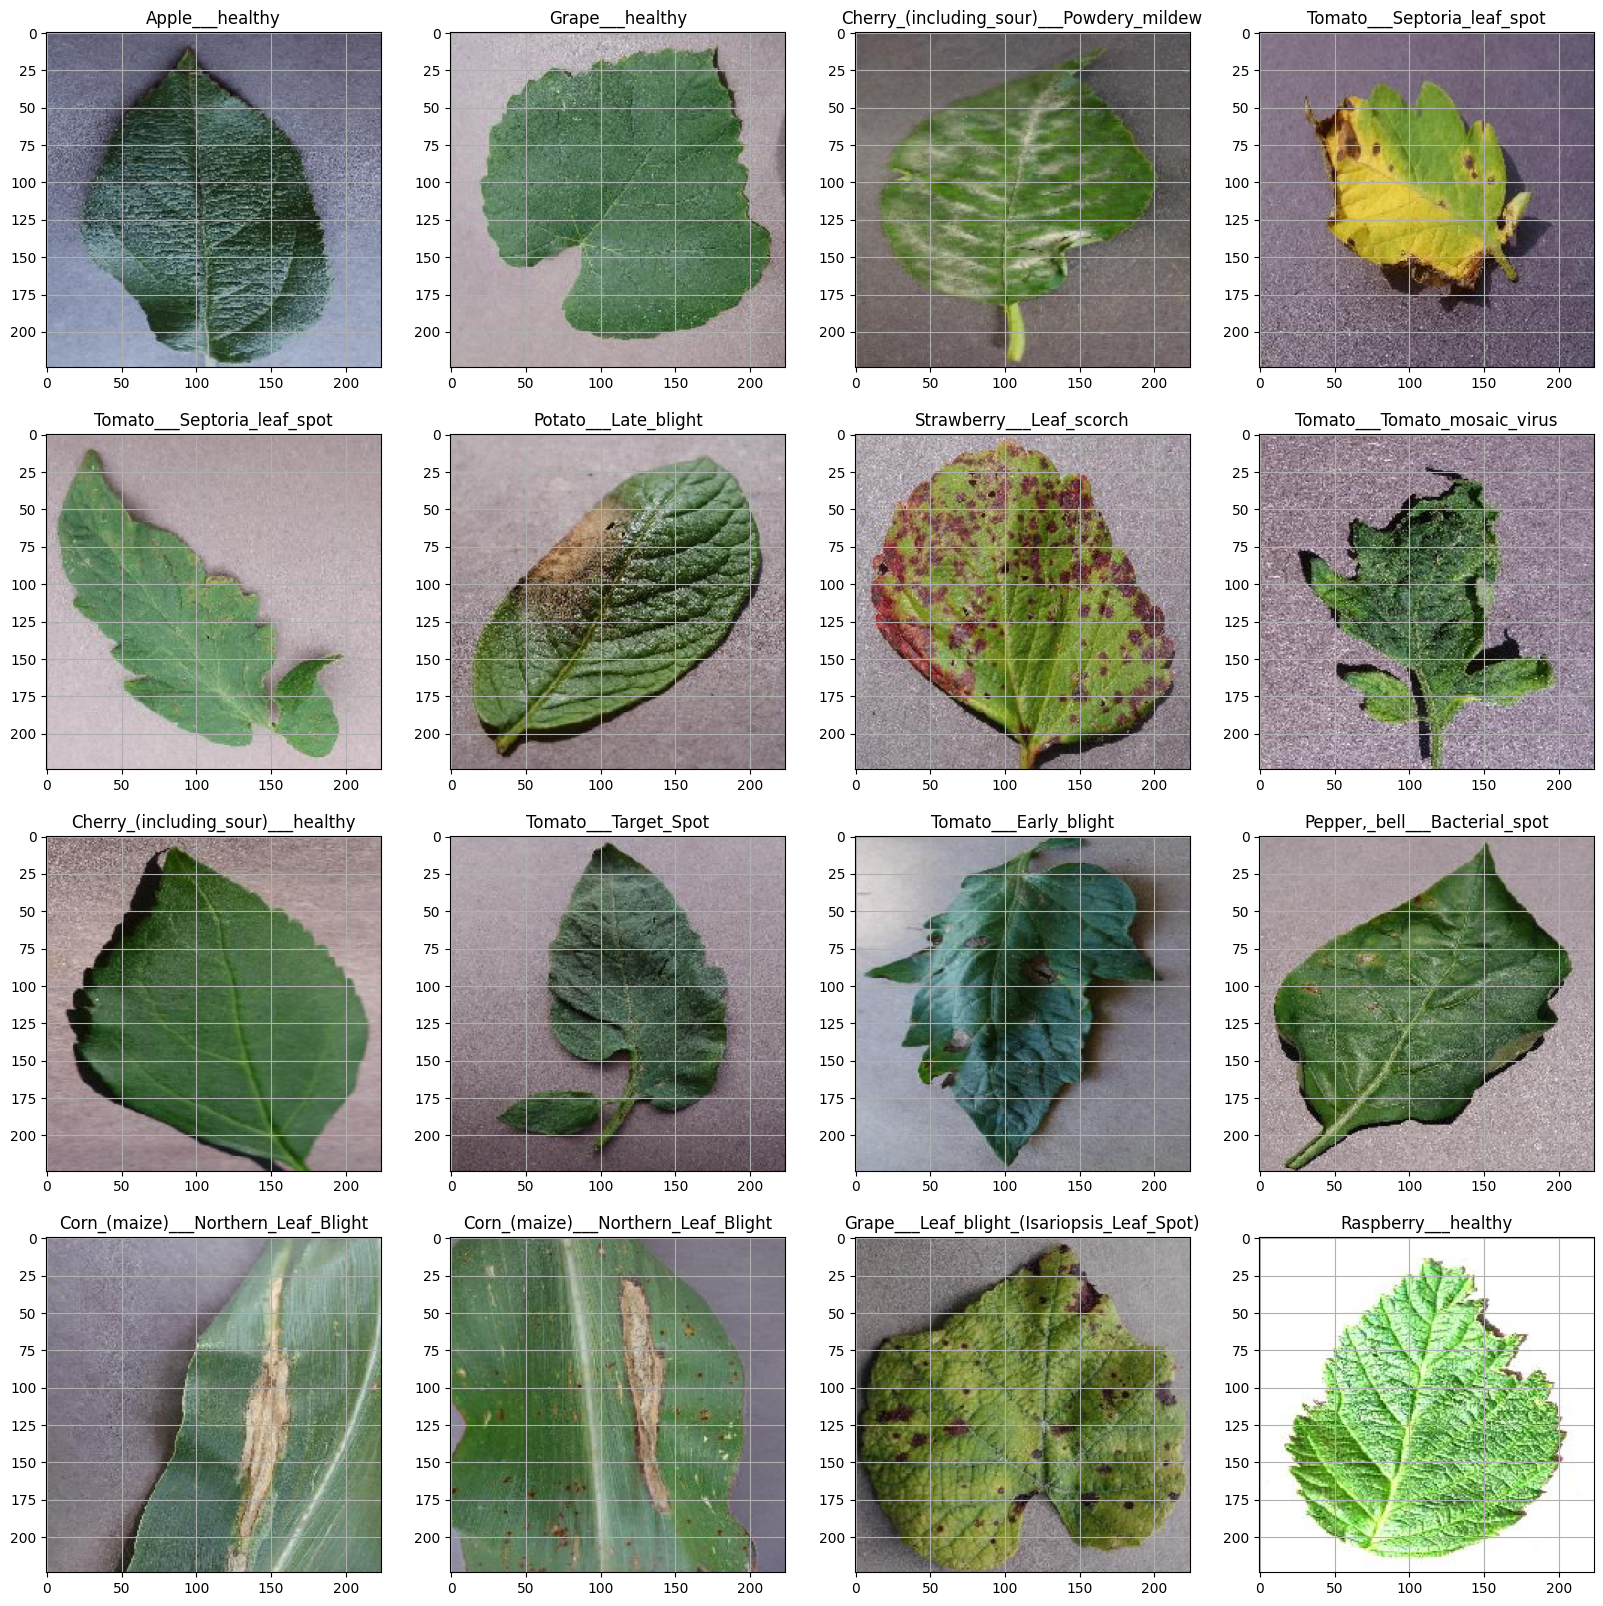

In [3]:
classes = list(train_generator.class_indices.keys())
plt.figure(figsize=(20, 20))

for x_batch, y_batch in train_generator:
    # Create a grid of 4x4 images
    for i in range(0, 16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(x_batch[i])
        plt.title(classes[np.where(y_batch[i] == 1)[0][0]])  # Set the corresponding title based on the label
        plt.grid(None)  # Turn off the grid on the subplot

    # Show the plot
    plt.show()
    break

In [9]:
valid = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
# Define the size variable before using it
size = 224
valid_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0
).flow_from_directory(
    valid,
    target_size=(size, size), # Now 'size' is defined and will be 224x224
    batch_size=164,
    class_mode='categorical',
    shuffle=False
)

Found 17572 images belonging to 38 classes.


In [6]:
test = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

# Create a test data generator
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None
).flow_from_directory(
    test,
    batch_size=64,
    target_size=(224, 224),
    color_mode='rgb',  # Use 'rgba' or 'grayscale'
    class_mode='categorical',  # Use 'binary', 'sparse', 'categorical', or None as needed
    shuffle=False
)

Found 17572 images belonging to 38 classes.


In [7]:

# Retrieve class indices
test_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [8]:
from tensorflow import keras

model = keras.models.Sequential()  # To build the model

model.add(keras.layers.Conv2D(filters=32, kernel_size=7, strides=1, padding="same", activation="relu", name="Conv1", input_shape=(224, 224, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=2, name="Pool1"))

model.add(keras.layers.Conv2D(filters=64, kernel_size=5, strides=1, padding="same", activation="relu", name="Conv2"))
model.add(keras.layers.MaxPooling2D(pool_size=2, name="Pool2"))

model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu", name="Conv3"))
model.add(keras.layers.MaxPooling2D(pool_size=2, name="Pool3"))

model.add(keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, padding="same", activation="relu", name="Conv4"))

model.add(keras.layers.Flatten(name="Flatten"))  # Flatten layer to convert into 1D vector
model.add(keras.layers.Dense(128, activation="relu", name="Dense1"))  # Hidden layer
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation="relu", name="Dense2"))  # Hidden layer
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(38, activation="softmax", name="Output"))  # Output layer
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 224, 224, 32)   │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool1 (MaxPooling2D)            │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 112, 112, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool2 (MaxPooling2D)            │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool3 (MaxPooling2D)            │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv4 (Conv2D)                  │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 38)             │         2,470 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,125,990 (99.66 MB)

 Trainable params: 26,125,990 (99.66 MB)

 Non-trainable params: 0 (0.00 B)

None


In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
model_ReduceLROnPlateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, min_lr=0.000001)

callbacks = [early_stopping, model_checkpoint, model_ReduceLROnPlateau]


In [11]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy', 'precision', 'recall'])


In [12]:
history = model.fit(train_generator, epochs=5, validation_data=valid_generator, callbacks=callbacks)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 318s 729ms/step - accuracy: 0.0707 - loss: 3.5692 - precision: 0.5321 - recall: 0.0156 - val_accuracy: 0.4183 - val_loss: 2.2197 - val_precision: 0.9169 - val_recall: 0.0961 - learning_rate: 0.0010
Epoch 2/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 208s 537ms/step - accuracy: 0.3290 - loss: 2.2827 - precision: 0.6803 - recall: 0.1515 - val_accuracy: 0.6403 - val_loss: 1.2892 - val_precision: 0.9088 - val_recall: 0.4195 - learning_rate: 0.0010
Epoch 3/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 208s 538ms/step - accuracy: 0.4888 - loss: 1.7061 - precision: 0.7527 - recall: 0.3053 - val_accuracy: 0.7434 - val_loss: 0.9005 - val_precision: 0.9112 - val_recall: 0.5726 - learning_rate: 0.0010
Epoch 4/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 269s 556ms/step - accuracy: 0.6017 - loss: 1.3066 - precision: 0.8016 - recall: 0.4436 - val_accuracy: 0.8119 - val_loss: 0.6811 - val_precision: 0.9386 - val_recall: 0.6802 - learning_rate: 0.0010
Epoch 5/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 205s 529ms/st

In [13]:

import seaborn as sns
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

precision = history.history['precision']
val_precision = history.history['val_precision']

recall = history.history['recall']
val_recall = history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)


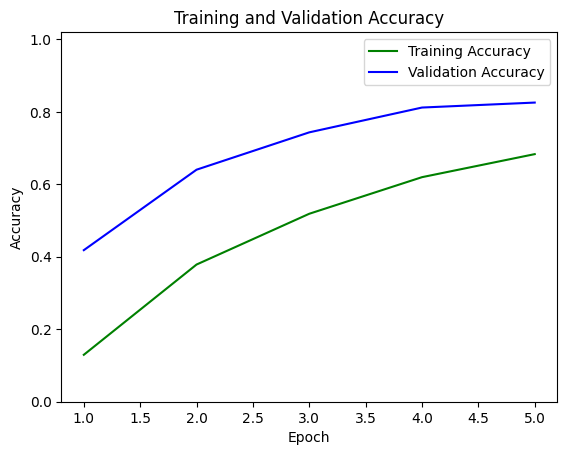

In [14]:

plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim(0, 1.02)
plt.show()

In [15]:
model_evaluate = model.evaluate(test_generator)
print('Loss: ', model_evaluate[0])
print('Accuracy: ', model_evaluate[1])
print('Precision: ', model_evaluate[2])
print('Recall: ', model_evaluate[3])

275/275 ━━━━━━━━━━━━━━━━━━━━ 51s 165ms/step - accuracy: 0.8839 - loss: 0.4576 - precision: 0.9424 - recall: 0.8068
Loss:  0.6152920126914978
Accuracy:  0.8255747556686401
Precision:  0.9314459562301636
Recall:  0.715228796005249


In [16]:
# TO save the model
model.save('PDDS.keras')